# Merugu Rakshith
# 2403A52007

# AIAI 02

**Install Required Libraries**

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Import Libraries**

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


**Loading dataset**

In [4]:
df = pd.read_csv("/content/Tweets.csv")
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


**Filter Negative Sentiment Tweets**

In [5]:
negative_df = df[df['airline_sentiment'] == 'negative']
negative_df = negative_df[['text']]
negative_df.head()


,text
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
5,@VirginAmerica seriously would pay $30 a fligh...
15,@VirginAmerica SFO-PDX schedule is still MIA.
17,@VirginAmerica I flew from NYC to SFO last we...


**Text Preprocessing**

In [8]:
stop_words = set(stopwords.words('english'))
nltk.download('punkt_tab')

def clean_text(text):
    text = re.sub(r"http\S+", "", text)      # remove URLs
    text = re.sub(r"@\w+", "", text)         # remove mentions
    text = re.sub(r"#\w+", "", text)         # remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove special chars
    text = text.lower()

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    return " ".join(tokens)

negative_df['cleaned_text'] = negative_df['text'].apply(clean_text)
negative_df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,cleaned_text
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing
5,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight seats didnt playing...
15,@VirginAmerica SFO-PDX schedule is still MIA.,sfopdx schedule still mia
17,@VirginAmerica I flew from NYC to SFO last we...,flew nyc sfo last week couldnt fully sit seat ...


**Compute TF-IDF**

In [9]:
tfidf = TfidfVectorizer(max_features=20)
tfidf_matrix = tfidf.fit_transform(negative_df['cleaned_text'])

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

tfidf_df.head()


,amp,call,cancelled,cant,customer,delayed,flight,flightled,get,help,hold,hour,hours,im,one,plane,service,still,time,us
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Identify Top TF-IDF Terms**

In [10]:
tfidf_scores = tfidf_df.sum().sort_values(ascending=False)

tfidf_scores


,0
flight,1481.000000
get,628.834187
cancelled,495.030891
service,480.297397
time,410.137949
hours,408.907301
help,400.960459
im,393.561573
customer,391.901305
hold,375.947292


**Bar Chart Visualization**

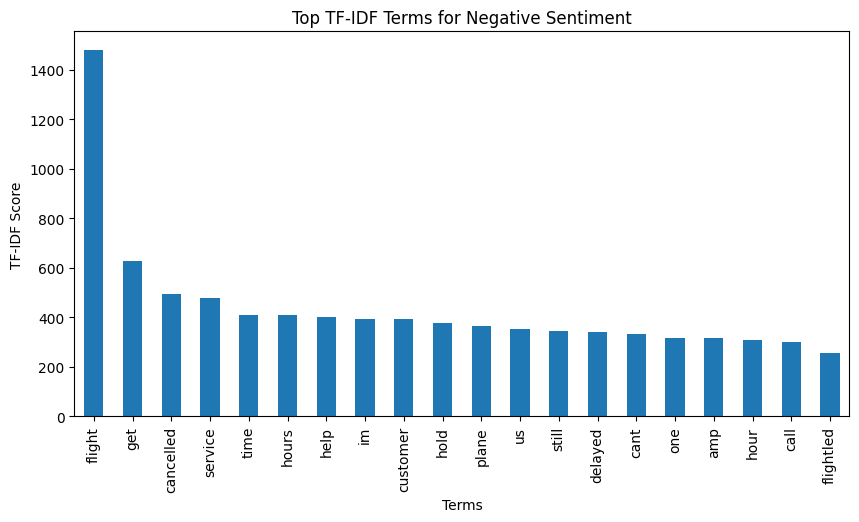

In [11]:
plt.figure(figsize=(10,5))
tfidf_scores.plot(kind='bar')
plt.title("Top TF-IDF Terms for Negative Sentiment")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.show()


**Word Cloud Visualization**

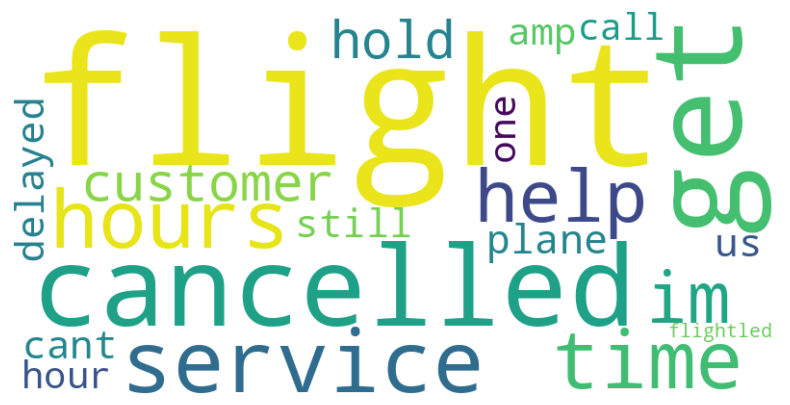

In [12]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(tfidf_scores)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Discussion Session**

In [ ]:
## Discussion

# In this experiment, TF-IDF was applied to negative airline tweets to
# identify the most important words contributing to negative sentiment.
# The analysis highlights frequent complaint-related terms such as delays,
# service, and cancellations. TF-IDF helps in emphasizing sentiment-specific
# vocabulary by reducing the impact of commonly occurring words.
